In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from glob import glob

In [5]:
female = glob('./data/crop/female_crop/*.png')
male = glob('./data/crop/male_crop/*.png')

In [6]:
male

['./data/crop/male_crop\\male_0.png',
 './data/crop/male_crop\\male_1.png',
 './data/crop/male_crop\\male_1003.png',
 './data/crop/male_crop\\male_1005.png',
 './data/crop/male_crop\\male_1007.png',
 './data/crop/male_crop\\male_1015.png',
 './data/crop/male_crop\\male_1017.png',
 './data/crop/male_crop\\male_102.png',
 './data/crop/male_crop\\male_1021.png',
 './data/crop/male_crop\\male_1023.png',
 './data/crop/male_crop\\male_1027.png',
 './data/crop/male_crop\\male_1029.png',
 './data/crop/male_crop\\male_103.png',
 './data/crop/male_crop\\male_1032.png',
 './data/crop/male_crop\\male_1034.png',
 './data/crop/male_crop\\male_1035.png',
 './data/crop/male_crop\\male_1040.png',
 './data/crop/male_crop\\male_1041.png',
 './data/crop/male_crop\\male_1043.png',
 './data/crop/male_crop\\male_1044.png',
 './data/crop/male_crop\\male_1046.png',
 './data/crop/male_crop\\male_1047.png',
 './data/crop/male_crop\\male_1048.png',
 './data/crop/male_crop\\male_105.png',
 './data/crop/male_crop\\

In [7]:
path = female + male
path

['./data/crop/female_crop\\female_0.png',
 './data/crop/female_crop\\female_1.png',
 './data/crop/female_crop\\female_100.png',
 './data/crop/female_crop\\female_1003.png',
 './data/crop/female_crop\\female_1008.png',
 './data/crop/female_crop\\female_1009.png',
 './data/crop/female_crop\\female_1012.png',
 './data/crop/female_crop\\female_1014.png',
 './data/crop/female_crop\\female_1017.png',
 './data/crop/female_crop\\female_102.png',
 './data/crop/female_crop\\female_1021.png',
 './data/crop/female_crop\\female_1022.png',
 './data/crop/female_crop\\female_1024.png',
 './data/crop/female_crop\\female_1025.png',
 './data/crop/female_crop\\female_1026.png',
 './data/crop/female_crop\\female_1027.png',
 './data/crop/female_crop\\female_1029.png',
 './data/crop/female_crop\\female_1030.png',
 './data/crop/female_crop\\female_1032.png',
 './data/crop/female_crop\\female_1033.png',
 './data/crop/female_crop\\female_1034.png',
 './data/crop/female_crop\\female_1035.png',
 './data/crop/fema

In [8]:
# getting size of image
def getSize(path):
    img = Image.open(path)
    return img.size[0]

In [9]:
df = pd.DataFrame(data=path,columns=['path'])
df.head(5)

,path
0,./data/crop/female_crop\female_0.png
1,./data/crop/female_crop\female_1.png
2,./data/crop/female_crop\female_100.png
3,./data/crop/female_crop\female_1003.png
4,./data/crop/female_crop\female_1008.png


In [10]:
df['size'] = df['path'].apply(getSize)
df.head()

,path,size
0,./data/crop/female_crop\female_0.png,273
1,./data/crop/female_crop\female_1.png,182
2,./data/crop/female_crop\female_100.png,182
3,./data/crop/female_crop\female_1003.png,182
4,./data/crop/female_crop\female_1008.png,81


In [11]:
df.tail()

,path,size
6053,./data/crop/male_crop\male_989.png,182
6054,./data/crop/male_crop\male_99.png,273
6055,./data/crop/male_crop\male_991.png,122
6056,./data/crop/male_crop\male_995.png,182
6057,./data/crop/male_crop\male_999.png,273


# Just Analysing our data

In [12]:
df.describe()

,size
count,6058.000000
mean,154.276824
std,71.422341
min,24.000000
25%,81.000000
50%,122.000000
75%,182.000000
max,410.000000


In [13]:
df['size'].plot('box')

TypeError: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='box')` instead of `Series.plot('box',)`.

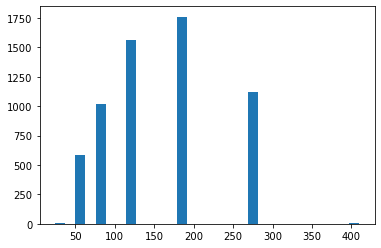

In [14]:
plt.hist(df['size'],bins=30)
plt.show()

### So, from analysis i will resize all the image in 100 x 100 form and remove image with less size

In [15]:
df_new = df[df['size'] > 60]

In [16]:
df_new

,path,size
0,./data/crop/female_crop\female_0.png,273
1,./data/crop/female_crop\female_1.png,182
2,./data/crop/female_crop\female_100.png,182
3,./data/crop/female_crop\female_1003.png,182
4,./data/crop/female_crop\female_1008.png,81
...,...,...
6053,./data/crop/male_crop\male_989.png,182
6054,./data/crop/male_crop\male_99.png,273
6055,./data/crop/male_crop\male_991.png,122
6056,./data/crop/male_crop\male_995.png,182


In [17]:
string = df_new['path'][0]
def gender(string):
    try:
        return string.split('_')[0].split('/')[-1]
    except:
        return None

In [18]:
df['gender'] = df['path'].apply(gender)

female    0.592605
male      0.407395
Name: gender, dtype: float64


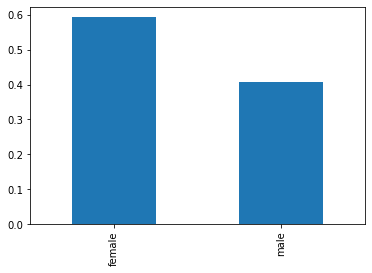

In [19]:
print(df['gender'].value_counts(normalize=True))
df['gender'].value_counts(normalize=True).plot(kind='bar')
plt.show()

1. 60 % Female are there and rest 40% are male
2. All the images size is greater than or equal to 81

conclusion : resizing all the image in df_new to 100 x 100 array

## Resize image

In [20]:
def resize_img(path_to_resize):
    try:
        img = cv2.imread(path_to_resize)
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        size = gray.shape[0]
        if size >= 100: 
            gray_re = cv2.resize(gray,(100,100),cv2.INTER_AREA) # SHRINK
        else:
            gray_re = cv2.resize(gray,(100,100),cv2.INTER_CUBIC) # EXPAND
        return gray_re.flatten()
    except:
        return None

In [21]:
len(resize_img(path[0]))

10000

In [22]:
df_new['gender'] = df_new['path'].apply(gender)
df_new.head()

<ipython-input-22-38f68fd0a050>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['gender'] = df_new['path'].apply(gender)


,path,size,gender
0,./data/crop/female_crop\female_0.png,273,female
1,./data/crop/female_crop\female_1.png,182,female
2,./data/crop/female_crop\female_100.png,182,female
3,./data/crop/female_crop\female_1003.png,182,female
4,./data/crop/female_crop\female_1008.png,81,female


In [23]:
df_new['structure_data'] = df_new['path'].apply(resize_img)

<ipython-input-23-616f1b7164b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['structure_data'] = df_new['path'].apply(resize_img)


In [24]:
df1 = df_new['structure_data'].apply(pd.Series)

In [25]:
df2 = pd.concat((df_new['gender'],df1),axis=1)

In [26]:
df2.head()

,gender,0,1,2,3,4,5,6,7,8,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,female,188,180,184,188,173,179,192,178,216,...,109,111,115,116,122,116,119,120,117,111
1,female,32,24,32,27,29,29,29,32,36,...,58,47,27,33,22,28,22,36,62,17
2,female,22,30,39,36,30,61,11,17,10,...,156,171,177,186,176,185,186,190,177,177
3,female,35,35,35,35,35,35,35,35,35,...,75,82,90,92,86,70,89,84,84,74
4,female,86,86,71,54,45,49,33,20,18,...,35,34,32,32,30,32,34,34,33,30


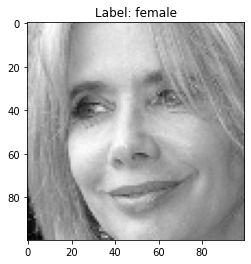

In [27]:
plt.imshow(df2.loc[0][1:].values.reshape(100,100).astype('int'),cmap='gray')
plt.title("Label: "+df2.loc[0]['gender'])
plt.show()

In [28]:
import pickle

In [29]:
pickle.dump(df2,open('./data/dataframe_images_100_100.pickle','wb'))